In [1]:
import scipy.interpolate as itp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob,csv
import scipy.io
import netCDF4 as nc
import os
%matplotlib inline

In [2]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/test/EXP00/1yr/*.nc'))
data=nc.Dataset(nc_filename[1])
dep= data.variables['deptht'];

In [3]:
def writecsv(j):
    for k in range (len(yinterp2)):
    #print k,yinterp2[k],xvals[k]
        for num in range(len(dep)):
            depth_min=dep[num]-1;
            depth_max=dep[num]+1;

            if (xvals[k]>depth_min)&(xvals[k]<depth_max):
                layer[num,j]=num;
                NEMO_dep[num,j]=dep[num];
                Real_dep[num,j]=xvals[k];
                z[num,j]=yinterp2[k];
                lons[num,j]=lon[0]
                lats[num,j]=lat[0]

#Vertical Pa part. Interpolation_spline

In [4]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Pa_part/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

found *.csv file: 
['/ocean/xiaoxiny/research/data/Pa_part/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_part/IC_d_p_32_1.csv', '/ocean/xiaoxiny/research/data/Pa_part/abondant_60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv']
7


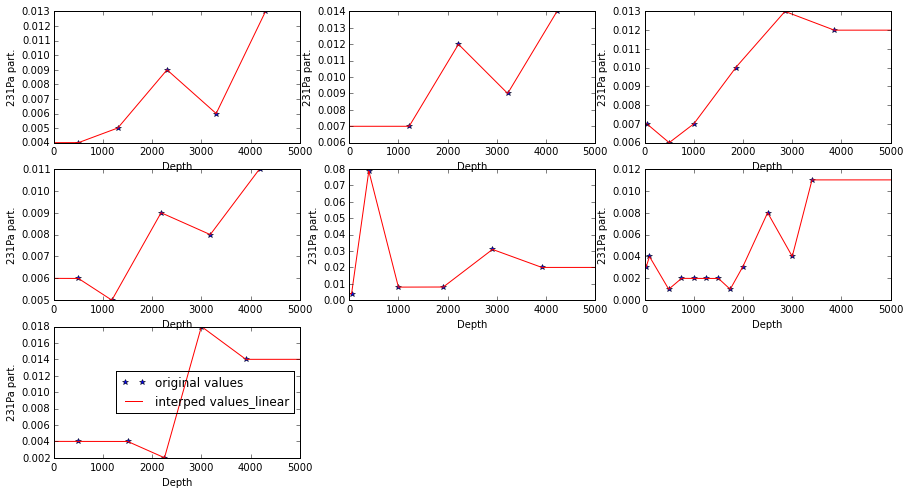

In [5]:
layer=np.empty([31,len(nc_filename)])
NEMO_dep=np.empty([31,len(nc_filename)])
Real_dep=np.empty([31,len(nc_filename)])
lons=np.empty([31,len(nc_filename)])
lats=np.empty([31,len(nc_filename)])
z=np.empty([31,len(nc_filename)])

for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    x= data['depth'];
    y=data['231Pa part.'];
    lon = data['long.'];
    lat = data['lat.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    x=x.compressed()
    y=y.compressed()
    #    xvals=np.linspace(min(x),max(x),2500)
    
    xvals=np.linspace(0,5500,3000)
    #yinterp = itp.spline(x,y,xvals)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,8))
    ax = plt.subplot(3,3,j+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    #plot2=plt.plot(xvals, yinterp, 'g-.',label='interped values_spline')
    plot3=plt.plot(xvals, yinterp2, 'r-',label='interped values_linear')
    plt.ylabel('231Pa part.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(j)
plt.legend(loc=0)
plt.show()
scipy.io.savemat('Pa_part',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Pa_part':z,'lons':lons,'lats':lats})

#Vertical Pa diss. Interpolation_spline

In [11]:
filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Pa_diss/*.csv'))
print("found *.csv file: \n{}".format(filename))
print len(filename)

found *.csv file: 
['/ocean/xiaoxiny/research/data/Pa_diss/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_1_ref5.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_Pacific_lat52.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_Pacific_lat53.csv', '/ocean/xiaoxiny/research/data/Pa_diss/IC_d_p_32_1.csv', '/ocean/xiaoxiny/research/data/Pa_diss/abondant_60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv']
10


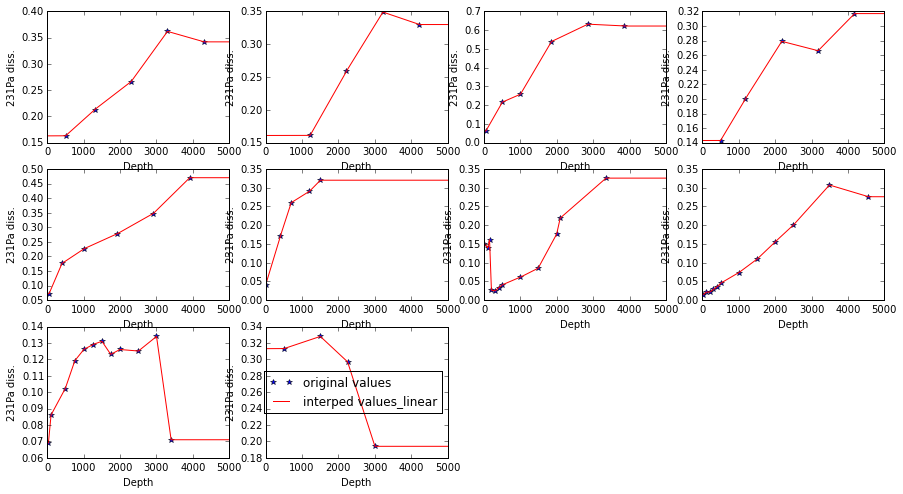

In [12]:
layer=np.empty([31,len(filename)])
NEMO_dep=np.empty([31,len(filename)])
Real_dep=np.empty([31,len(filename)])
lons=np.empty([31,len(filename)])
lats=np.empty([31,len(filename)])
z=np.empty([31,len(filename)])
for j in range(len(filename)):

    data=pd.read_csv(filename[j])
    x= data['depth'];
    y=data['231Pa diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    x=np.ma.masked_where(np.isnan(y),x)
    y=np.ma.masked_where(np.isnan(y),y)
    x=x.compressed()
    y=y.compressed()
    
    xvals=np.linspace(0,5500,3000)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,8))
    ax = plt.subplot(3,4,j+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    plot3=plt.plot(xvals, yinterp2, 'r-',label='interped values_linear')
    plt.ylabel('231Pa diss.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(j)
plt.legend(loc=0)
plt.show()
scipy.io.savemat('Pa_diss',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Pa_diss':z,'lons':lons,'lats':lats})

#Vertical Th part. Interpolation_spline&linear

In [4]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Th_part/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

found *.csv file: 
['/ocean/xiaoxiny/research/data/Th_part/1_ref5.csv', '/ocean/xiaoxiny/research/data/Th_part/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_part/60changed5.Th-Pa_data_July2012-Oce

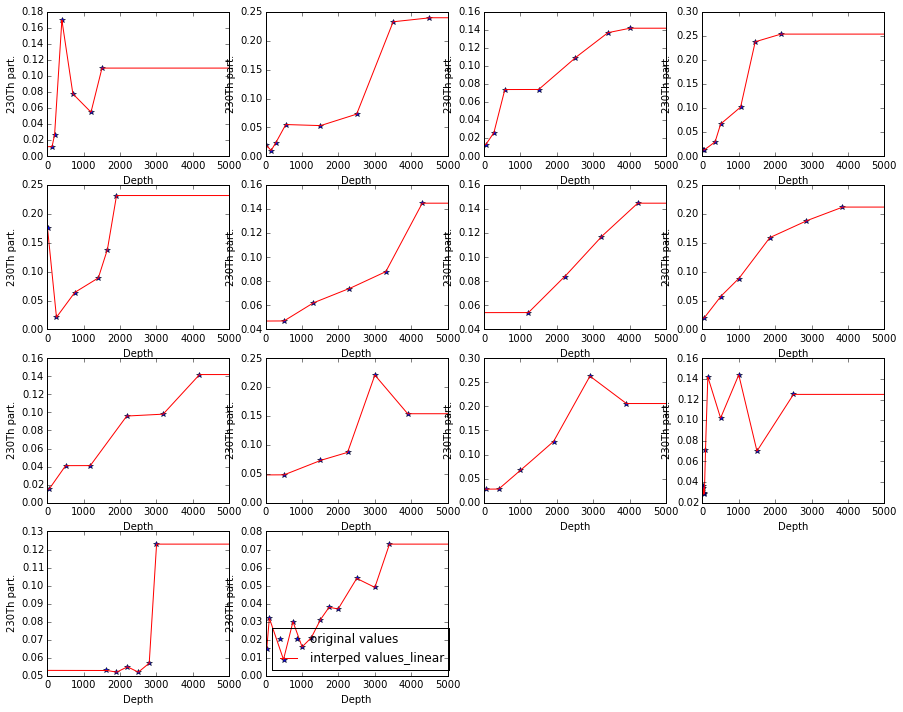

In [5]:
layer=np.empty([31,len(nc_filename)])
NEMO_dep=np.empty([31,len(nc_filename)])
Real_dep=np.empty([31,len(nc_filename)])
lons=np.empty([31,len(nc_filename)])
lats=np.empty([31,len(nc_filename)])
z=np.empty([31,len(nc_filename)])

for k in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[k])
    x= data['depth'];
    y=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    x=x.compressed()
    y=y.compressed()
    
    xvals=np.linspace(0,5500,3000)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,15))
    ax = plt.subplot(5,4,k+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    plot3=plt.plot(xvals, yinterp2, 'r-',label='interped values_linear')
    plt.ylabel('230Th part.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(k)
plt.legend(loc=0)
plt.show()
scipy.io.savemat('Th_part',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Th_part':z,'lons':lons,'lats':lats})

#Vertical Th diss. Interpolation_spline&linear

In [15]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/data/Th_diss/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))
print len(nc_filename)

found *.csv file: 
['/ocean/xiaoxiny/research/data/Th_diss/1_ref5.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/data/Th_diss/60changed5.Th-Pa_data_July2012-Oce

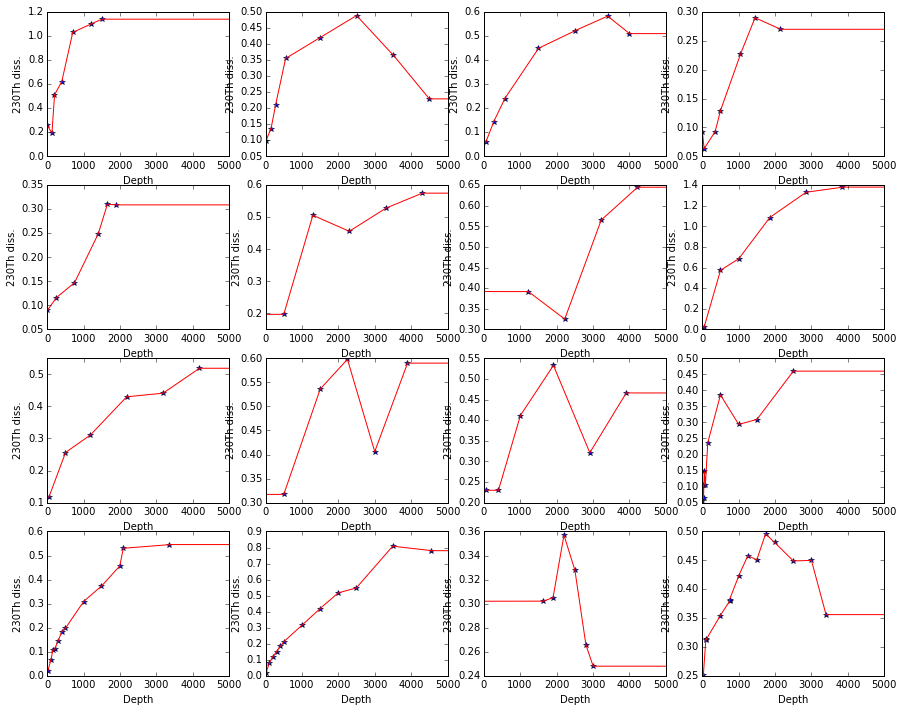

In [17]:
layer=np.empty([31,len(nc_filename)])
NEMO_dep=np.empty([31,len(nc_filename)])
Real_dep=np.empty([31,len(nc_filename)])
lons=np.empty([31,len(nc_filename)])
lats=np.empty([31,len(nc_filename)])
z=np.empty([31,len(nc_filename)])
for i in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[i])
    x= data['depth'];
    y=data['230Th diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y)
    x=x.compressed()
    y=y.compressed()
    
    xvals=np.linspace(0,5500,3000)
    yinterp2 = np.interp(xvals, x, y)
    
    ax = plt.figure(1,figsize=(15,15))
    ax = plt.subplot(5,4,i+1)
    plot1=plt.plot(x, y, 'b*',label='original values')
    plot3=plt.plot(xvals, yinterp2, 'r-',label='interped values_linear')
    plt.ylabel('230Th diss.')
    plt.xlabel('Depth')
    plt.xlim([0,5000])
    writecsv(i)
    #plt.legend(loc=0)
plt.show()
scipy.io.savemat('Th_diss',
                 {'layer':layer,'NEMO_dep':NEMO_dep,'Real_dep':Real_dep,'Th_diss':z,'lons':lons,'lats':lats})

#load data

In [18]:
Th_diss_data=scipy.io.loadmat('Th_diss.mat')
layer=Th_diss_data['Th_diss']
print layer

[[ 0.25703747  0.097       0.058       0.092       0.09        0.197       0.392
   0.021       0.118       0.317       0.23        0.05722949  0.01833
   0.0188      0.302       0.251     ]
 [ 0.25209993  0.09934855  0.058       0.08628466  0.09092402  0.197       0.392
   0.021       0.118       0.317       0.23        0.07969532  0.01920391
   0.01991734  0.302       0.251     ]
 [ 0.24617488  0.10232871  0.058       0.07903224  0.09209654  0.197       0.392
   0.021       0.118       0.317       0.23        0.10216405  0.02495672
   0.02727268  0.302       0.251     ]
 [ 0.24123734  0.10481217  0.058       0.07298856  0.09307364  0.197       0.392
   0.021       0.118       0.317       0.23        0.06365122  0.02975074
   0.03340213  0.302       0.25536045]
 [ 0.23531228  0.10779233  0.058       0.06573614  0.09424616  0.197       0.392
   0.021       0.118       0.317       0.23        0.10910662  0.03550355
   0.04075748  0.302       0.26526375]
 [ 0.23037474  0.1102758   0.0599